In [1]:
# Test installazione librerie
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import pandas_ta as ta

print("✅ Pandas version:", pd.__version__)
print("✅ Numpy version:", np.__version__)
print("✅ Matplotlib installato correttamente")
print("✅ yfinance installato correttamente")
print("✅ pandas_ta installato correttamente")

# Test rapido: scarichiamo 1 settimana di dati di AAPL
print("\n📊 Test download dati...")
data = yf.download("AAPL", period="5d", progress=False)
print(data.head())
print("\n🎉 Setup completato con successo!")

✅ Pandas version: 2.3.3
✅ Numpy version: 2.2.6
✅ Matplotlib installato correttamente
✅ yfinance installato correttamente
✅ pandas_ta installato correttamente

📊 Test download dati...


/tmp/ipykernel_2053/640845769.py:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("AAPL", period="5d", progress=False)


Price            Close        High         Low        Open    Volume
Ticker            AAPL        AAPL        AAPL        AAPL      AAPL
Date                                                                
2025-11-13  272.950012  276.700012  272.089996  274.109985  49602800
2025-11-14  272.410004  275.959991  269.600006  271.049988  47431300
2025-11-17  267.459991  270.489990  265.730011  268.820007  45018300
2025-11-18  267.440002  270.709991  265.320007  269.989990  45677300
2025-11-19  268.559998  272.209991  265.500000  265.524994  35871303

🎉 Setup completato con successo!


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime, timedelta

# Configurazione
plt.style.use('seaborn-v0_8-darkgrid')  # Stile grafici più professionale
plt.rcParams['figure.figsize'] = (14, 7)

# Lista di 10 azioni da analizzare
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA', 
           'NVDA', 'META', 'JPM', 'V', 'WMT']

# Periodo di analisi: ultimi 2 anni
end_date = datetime.now()
start_date = end_date - timedelta(days=365*2)

print(f"📅 Scarico dati dal {start_date.date()} al {end_date.date()}")
print("="*60)

# Dizionario per salvare i dati
stocks_data = {}

# Scarica i dati per ogni ticker
for ticker in tickers:
    print(f"⬇️  Scaricando {ticker}...", end=" ")
    try:
        data = yf.download(ticker, start=start_date, end=end_date, progress=False)
        stocks_data[ticker] = data
        print(f"✅ {len(data)} giorni scaricati")
    except Exception as e:
        print(f"❌ Errore: {e}")

print("="*60)
print(f"✅ Scaricati dati per {len(stocks_data)} azioni")

📅 Scarico dati dal 2023-11-21 al 2025-11-20
⬇️  Scaricando AAPL... 

/tmp/ipykernel_2053/1208621791.py:29: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)


✅ 501 giorni scaricati
⬇️  Scaricando MSFT... 

/tmp/ipykernel_2053/1208621791.py:29: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)


✅ 501 giorni scaricati
⬇️  Scaricando GOOGL... 

/tmp/ipykernel_2053/1208621791.py:29: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)


✅ 501 giorni scaricati
⬇️  Scaricando AMZN... 

/tmp/ipykernel_2053/1208621791.py:29: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)


✅ 501 giorni scaricati
⬇️  Scaricando TSLA... 

/tmp/ipykernel_2053/1208621791.py:29: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)


✅ 501 giorni scaricati
⬇️  Scaricando NVDA... 

/tmp/ipykernel_2053/1208621791.py:29: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)


✅ 501 giorni scaricati
⬇️  Scaricando META... 

/tmp/ipykernel_2053/1208621791.py:29: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)


✅ 501 giorni scaricati
⬇️  Scaricando JPM... 

/tmp/ipykernel_2053/1208621791.py:29: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)


✅ 501 giorni scaricati
⬇️  Scaricando V... 

/tmp/ipykernel_2053/1208621791.py:29: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)


✅ 501 giorni scaricati
⬇️  Scaricando WMT... 

/tmp/ipykernel_2053/1208621791.py:29: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, progress=False)


✅ 501 giorni scaricati
✅ Scaricati dati per 10 azioni


In [3]:
# Prendiamo AAPL come esempio
aapl = stocks_data['AAPL']

print("📊 Struttura dati AAPL:")
print(aapl.head(10))  # Prime 10 righe
print("\n📈 Info dataset:")
print(aapl.info())
print("\n📊 Statistiche descrittive:")
print(aapl.describe())

📊 Struttura dati AAPL:
Price            Close        High         Low        Open    Volume
Ticker            AAPL        AAPL        AAPL        AAPL      AAPL
Date                                                                
2023-11-21  188.856445  189.728217  187.964871  189.619246  38134500
2023-11-22  189.520157  191.124996  189.044652  189.698481  39617700
2023-11-24  188.192719  189.114011  187.479453  189.084292  24048300
2023-11-27  188.014404  188.886176  187.132731  188.143193  40552600
2023-11-28  188.618683  189.292329  187.628038  188.004488  38415400
2023-11-29  187.598358  190.292913  187.202106  189.114043  43014200
2023-11-30  188.172897  188.539446  186.429369  188.063926  48794400
2023-12-01  189.450851  189.767850  187.459646  188.549361  45704800
2023-12-04  187.657745  188.271955  185.696274  188.202603  43389500
2023-12-05  191.610428  192.581255  188.400735  188.430468  66628400

📈 Info dataset:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 501 entrie

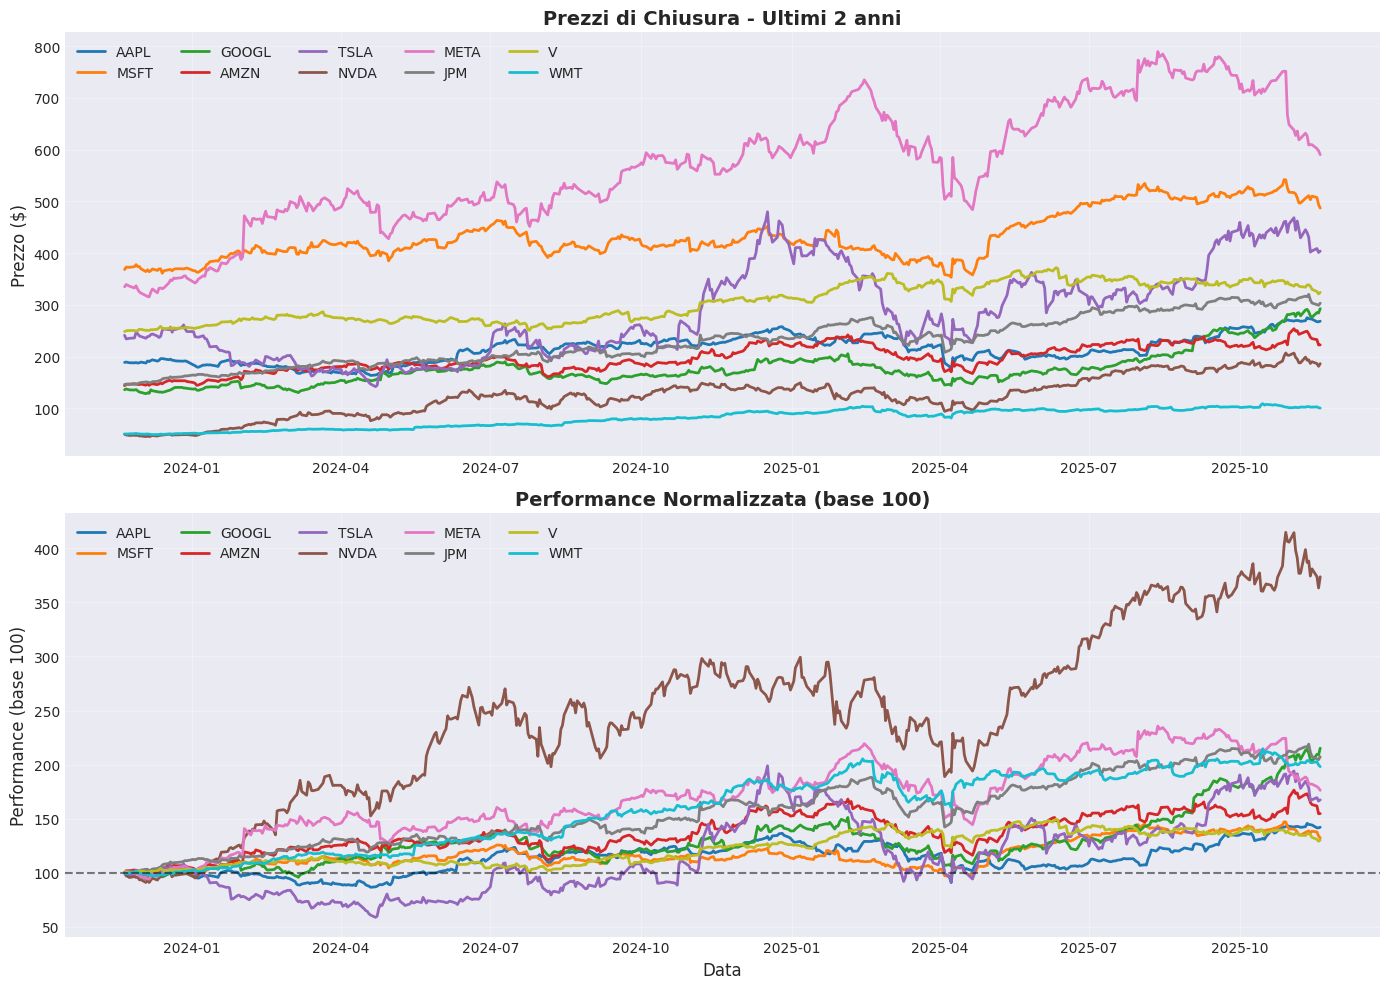

In [4]:
# Plot del prezzo di chiusura di tutte le 10 azioni
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Grafico 1: Prezzi assoluti
axes[0].set_title('Prezzi di Chiusura - Ultimi 2 anni', fontsize=14, fontweight='bold')
for ticker in tickers:
    if ticker in stocks_data:
        axes[0].plot(stocks_data[ticker].index, 
                     stocks_data[ticker]['Close'], 
                     label=ticker, linewidth=2)
axes[0].set_ylabel('Prezzo ($)', fontsize=12)
axes[0].legend(loc='best', ncol=5)
axes[0].grid(True, alpha=0.3)

# Grafico 2: Performance normalizzata (% change dal primo giorno)
axes[1].set_title('Performance Normalizzata (base 100)', fontsize=14, fontweight='bold')
for ticker in tickers:
    if ticker in stocks_data:
        normalized = (stocks_data[ticker]['Close'] / stocks_data[ticker]['Close'].iloc[0]) * 100
        axes[1].plot(normalized.index, normalized, label=ticker, linewidth=2)
axes[1].set_ylabel('Performance (base 100)', fontsize=12)
axes[1].set_xlabel('Data', fontsize=12)
axes[1].legend(loc='best', ncol=5)
axes[1].grid(True, alpha=0.3)
axes[1].axhline(y=100, color='black', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

In [10]:
# Calcola rendimenti giornalieri e volatilità
print("\n📊 ANALISI COMPARATIVA - Ultimi 2 anni")
print("="*80)
print(f"{'Ticker':<10} {'Prezzo Iniziale':<15} {'Prezzo Finale':<15} {'Return %':<12} {'Volatilità %':<15}")
print("="*80)

for ticker in tickers:
    if ticker in stocks_data:
        data = stocks_data[ticker]
        
        # Prezzo iniziale e finale
        price_start = data['Close'].iloc[0]
        price_end = data['Close'].iloc[-1]
        
        # Return percentuale totale
        total_return = ((price_end - price_start) / price_start) * 100
        
        # Volatilità (std dei rendimenti giornalieri annualizzata)
        daily_returns = data['Close'].pct_change().dropna()
        volatility = daily_returns.std() * np.sqrt(252) * 100  # Annualizzata
        print(f"{ticker:<10} ${price_start.iloc[0]:<14.2f} ${price_end.iloc[0]:<14.2f} {total_return.iloc[0]:<11.2f}% {volatility.iloc[0]:<14.2f}%")

print("="*80)


📊 ANALISI COMPARATIVA - Ultimi 2 anni
Ticker     Prezzo Iniziale Prezzo Finale   Return %     Volatilità %   
AAPL       $188.86         $268.56         42.20      % 28.02         %
MSFT       $368.28         $487.12         32.27      % 22.06         %
GOOGL      $136.03         $292.81         115.25     % 30.00         %
AMZN       $143.90         $222.69         54.75      % 31.35         %
TSLA       $241.20         $403.99         67.49      % 63.35         %
NVDA       $49.91          $186.52         273.68     % 51.07         %
META       $334.92         $590.32         76.26      % 37.24         %
JPM        $146.31         $303.27         107.29     % 23.65         %
V          $248.55         $324.12         30.40      % 19.41         %
WMT        $50.77          $100.61         98.18      % 21.03         %


/tmp/ipykernel_2053/3751238878.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, period='1y', progress=False)


📊 Analisi PLTR - Ultimo anno
Price            Close        High         Low        Open    Volume
Date                                                                
2025-11-06  175.050003  191.089996  174.529999  187.990005  78468600
2025-11-07  177.929993  178.699997  168.910004  173.149994  73989700
2025-11-10  193.610001  194.929993  183.520004  184.309998  87764200
2025-11-11  190.960007  192.925003  187.130005  190.335007  49819700
2025-11-12  184.169998  190.580002  180.399994  190.580002  55347100
2025-11-13  172.139999  182.699997  170.731003  181.714996  63188800
2025-11-14  174.009995  177.289993  164.500000  166.975006  62596800
2025-11-17  171.250000  174.240005  167.679993  170.529999  50339000
2025-11-18  167.330002  172.830002  165.500000  168.369995  53710100
2025-11-19  165.419998  169.591003  162.419998  167.800003  44599304


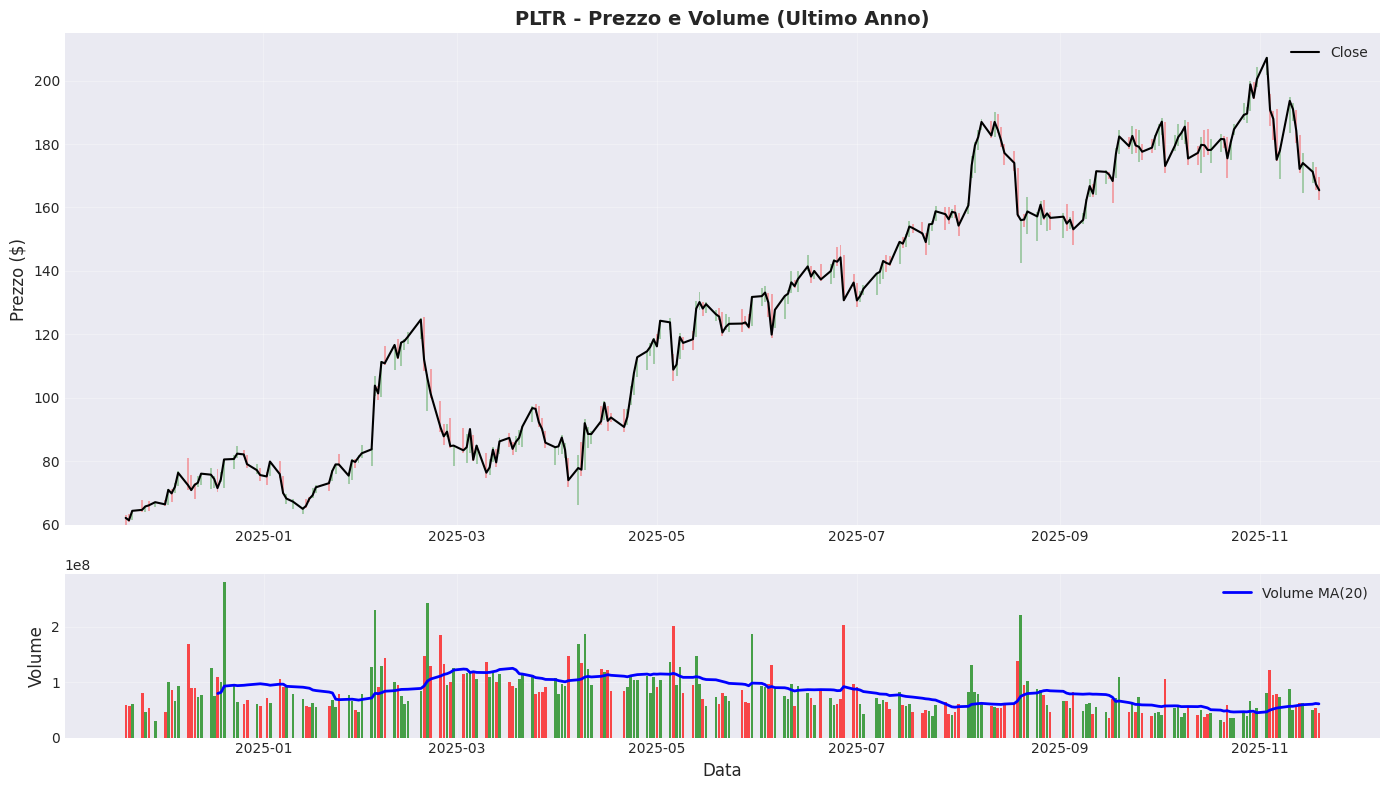


📊 STATISTICHE VOLUME:
Volume medio giornaliero: 82,720,073
Volume mediano: 75,393,150
Volume massimo: 281,230,800
Volume minimo: 27,528,100
Deviazione standard: 38,400,199


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime, timedelta

# Scarica dati con volumi
ticker = 'PLTR'
data = yf.download(ticker, period='1y', progress=False)

# FIX: Se le colonne hanno MultiIndex, appiattiscile
if isinstance(data.columns, pd.MultiIndex):
    data.columns = data.columns.get_level_values(0)

print(f"📊 Analisi {ticker} - Ultimo anno")
print("="*60)
print(data.tail(10))

# Crea un grafico professionale con prezzo + volumi
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8), 
                                gridspec_kw={'height_ratios': [3, 1]})

# Grafico 1: Candlestick semplificato (Close price con colori)
# FIX: Accedi direttamente alle Series, non usare .iloc[i] due volte
colors = ['green' if close >= open_price else 'red' 
          for close, open_price in zip(data['Close'], data['Open'])]

# FIX: Calcola bottom correttamente
ax1.bar(data.index, data['High'] - data['Low'], 
        bottom=data['Low'], width=0.6, color=colors, alpha=0.3)
ax1.plot(data.index, data['Close'], color='black', linewidth=1.5, label='Close')
ax1.set_title(f'{ticker} - Prezzo e Volume (Ultimo Anno)', 
              fontsize=14, fontweight='bold')
ax1.set_ylabel('Prezzo ($)', fontsize=12)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Grafico 2: Volume bars
volume_colors = ['green' if close >= open_price else 'red' 
                 for close, open_price in zip(data['Close'], data['Open'])]
ax2.bar(data.index, data['Volume'], color=volume_colors, alpha=0.7)
ax2.set_ylabel('Volume', fontsize=12)
ax2.set_xlabel('Data', fontsize=12)
ax2.grid(True, alpha=0.3)

# Aggiungi media mobile del volume (20 giorni)
volume_ma = data['Volume'].rolling(window=20).mean()
ax2.plot(data.index, volume_ma, color='blue', linewidth=2, 
         label='Volume MA(20)')
ax2.legend()

plt.tight_layout()
plt.show()

# Statistiche sui volumi
print("\n📊 STATISTICHE VOLUME:")
print(f"Volume medio giornaliero: {data['Volume'].mean():,.0f}")
print(f"Volume mediano: {data['Volume'].median():,.0f}")
print(f"Volume massimo: {data['Volume'].max():,.0f}")
print(f"Volume minimo: {data['Volume'].min():,.0f}")
print(f"Deviazione standard: {data['Volume'].std():,.0f}")

In [20]:
def prepare_stock_data(ticker, period='1y'):
    """
    Scarica e prepara dati di un'azione con features aggiuntive.
    """
    
    # Download dati
    print(f"📥 Scaricando {ticker}...")
    df = yf.download(ticker, period=period, progress=False)
    
    # FIX: Appiattisci MultiIndex columns se presente
    if isinstance(df.columns, pd.MultiIndex):
        df.columns = df.columns.get_level_values(0)
    
    # Rimuovi eventuali righe con valori mancanti
    df = df.dropna()
    
    # Calcola rendimenti giornalieri
    df['Daily_Return'] = df['Close'].pct_change()
    
    # Calcola log returns (più accurati matematicamente)
    df['Log_Return'] = np.log(df['Close'] / df['Close'].shift(1))
    
    # Range giornaliero (High - Low) in percentuale
    df['Daily_Range_Pct'] = ((df['High'] - df['Low']) / df['Low']) * 100
    
    # Gap dall'apertura (Open vs Close precedente)
    df['Gap_Pct'] = ((df['Open'] - df['Close'].shift(1)) / df['Close'].shift(1)) * 100
    
    # Volume ratio vs media mobile 20 giorni
    df['Volume_MA20'] = df['Volume'].rolling(window=20).mean()
    df['Volume_Ratio'] = df['Volume'] / df['Volume_MA20']
    
    # Rimuovi le prime righe con NaN create dai calcoli
    df = df.dropna()
    
    print(f"✅ {ticker}: {len(df)} giorni di dati preparati")
    print(f"📅 Periodo: {df.index[0].date()} → {df.index[-1].date()}")
    
    return df

In [24]:
pltr_data = prepare_stock_data("PLTR", period='1y')

📥 Scaricando PLTR...


/tmp/ipykernel_2053/2909504129.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period, progress=False)


✅ PLTR: 231 giorni di dati preparati
📅 Periodo: 2024-12-18 → 2025-11-19


In [25]:
# Trova i giorni con volume anomalo (>2x la media)
high_volume_days = pltr_data[pltr_data['Volume_Ratio'] > 2.0]

print(f"\n🔥 GIORNI CON VOLUME ANOMALO (>2x media) per PLTR:")
print(f"Totale: {len(high_volume_days)} giorni su {len(pltr_data)}")
print("\nTop 5 giorni per volume ratio:")
print(high_volume_days.nlargest(5, 'Volume_Ratio')[['Close', 'Volume', 'Volume_Ratio', 'Daily_Return']])

# Trova i giorni con maggiore volatilità intraday
high_volatility_days = pltr_data.nlargest(10, 'Daily_Range_Pct')

print(f"\n⚡ TOP 10 GIORNI PIÙ VOLATILI (range % più alto):")
print(high_volatility_days[['Close', 'Daily_Range_Pct', 'Daily_Return', 'Volume_Ratio']])

# Correlazione tra volume e movimento di prezzo
correlation = pltr_data['Volume_Ratio'].corr(abs(pltr_data['Daily_Return']))
print(f"\n🔗 Correlazione tra Volume Ratio e |Daily Return|: {correlation:.3f}")
print("(Valori vicini a 1 = forte correlazione, vicini a 0 = nessuna correlazione)")


🔥 GIORNI CON VOLUME ANOMALO (>2x media) per PLTR:
Totale: 8 giorni su 231

Top 5 giorni per volume ratio:
Price            Close     Volume  Volume_Ratio  Daily_Return
Date                                                         
2024-12-20   80.550003  281230800      3.030761      0.085433
2025-08-20  156.009995  220336400      2.964183     -0.011030
2025-02-04  103.830002  230806800      2.890794      0.239909
2025-11-04  190.740005  121380900      2.455305     -0.079351
2025-02-20  106.269997  243093900      2.383376     -0.051669

⚡ TOP 10 GIORNI PIÙ VOLATILI (range % più alto):
Price            Close  Daily_Range_Pct  Daily_Return  Volume_Ratio
Date                                                               
2025-04-07   77.839996        23.714458      0.051750      1.621974
2025-04-09   92.010002        20.784271      0.189990      1.716557
2025-02-19  112.059998        15.521377     -0.100786      1.582741
2025-04-08   77.320000        14.482846     -0.006680      1.282346
2

In [26]:
def create_stock_dashboard(tickers, period='1y'):
    """
    Crea una dashboard completa per analizzare multiple azioni.
    """
    
    # Prepara dati per tutti i ticker
    all_data = {}
    for ticker in tickers:
        all_data[ticker] = prepare_stock_data(ticker, period)
    
    # Crea summary statistics
    summary = []
    for ticker, data in all_data.items():
        # Calcola total return
        total_return = ((data['Close'].iloc[-1] / data['Close'].iloc[0]) - 1) * 100
        
        # Volatilità annualizzata
        volatility = data['Daily_Return'].std() * np.sqrt(252) * 100
        
        # Avg daily return
        avg_daily_return = data['Daily_Return'].mean() * 100
        
        # Max Drawdown: massima perdita dal picco
        cumulative = (1 + data['Daily_Return']).cumprod()
        running_max = cumulative.cummax()
        drawdown = (cumulative - running_max) / running_max
        max_drawdown = drawdown.min() * 100
        
        # Sharpe Ratio (assumiamo risk-free rate = 0 per semplicità)
        sharpe = (data['Daily_Return'].mean() / data['Daily_Return'].std()) * np.sqrt(252) if data['Daily_Return'].std() != 0 else 0
        
        # Volume medio
        avg_volume = data['Volume'].mean()
        
        stats = {
            'Ticker': ticker,
            'Total_Return_%': round(total_return, 2),
            'Volatility_%': round(volatility, 2),
            'Avg_Daily_Return_%': round(avg_daily_return, 3),
            'Max_Drawdown_%': round(max_drawdown, 2),
            'Sharpe_Ratio': round(sharpe, 2),
            'Avg_Volume': int(avg_volume)
        }
        summary.append(stats)
    
    summary_df = pd.DataFrame(summary)
    summary_df = summary_df.sort_values('Total_Return_%', ascending=False)
    
    print("\n" + "="*100)
    print("📊 DASHBOARD COMPARATIVA - PERFORMANCE E RISCHIO")
    print("="*100)
    print(summary_df.to_string(index=False))
    print("="*100)
    
    # Insight aggiuntivi
    print("\n💡 INSIGHTS:")
    best_return = summary_df.iloc[0]
    best_sharpe = summary_df.nlargest(1, 'Sharpe_Ratio').iloc[0]
    worst_drawdown = summary_df.nsmallest(1, 'Max_Drawdown_%').iloc[0]
    
    print(f"🏆 Miglior Return: {best_return['Ticker']} ({best_return['Total_Return_%']:.2f}%)")
    print(f"⚖️  Miglior Sharpe Ratio: {best_sharpe['Ticker']} ({best_sharpe['Sharpe_Ratio']:.2f})")
    print(f"⚠️  Peggior Max Drawdown: {worst_drawdown['Ticker']} ({worst_drawdown['Max_Drawdown_%']:.2f}%)")
    
    return all_data, summary_df

# Testa con le tue azioni
my_tickers = ['PLTR', 'GOOGL', 'RKLB', 'AAPL', 'SPY']
data_dict, summary = create_stock_dashboard(my_tickers, period='1y')

📥 Scaricando PLTR...


/tmp/ipykernel_2053/2909504129.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period, progress=False)


✅ PLTR: 231 giorni di dati preparati
📅 Periodo: 2024-12-18 → 2025-11-19
📥 Scaricando GOOGL...


/tmp/ipykernel_2053/2909504129.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period, progress=False)


✅ GOOGL: 231 giorni di dati preparati
📅 Periodo: 2024-12-18 → 2025-11-19
📥 Scaricando RKLB...


/tmp/ipykernel_2053/2909504129.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period, progress=False)


✅ RKLB: 231 giorni di dati preparati
📅 Periodo: 2024-12-18 → 2025-11-19
📥 Scaricando AAPL...


/tmp/ipykernel_2053/2909504129.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period, progress=False)


✅ AAPL: 231 giorni di dati preparati
📅 Periodo: 2024-12-18 → 2025-11-19
📥 Scaricando SPY...


/tmp/ipykernel_2053/2909504129.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period=period, progress=False)


✅ SPY: 231 giorni di dati preparati
📅 Periodo: 2024-12-18 → 2025-11-19

📊 DASHBOARD COMPARATIVA - PERFORMANCE E RISCHIO
Ticker  Total_Return_%  Volatility_%  Avg_Daily_Return_%  Max_Drawdown_%  Sharpe_Ratio  Avg_Volume
  PLTR          131.32         69.42               0.440          -40.61          1.60    83112793
  RKLB           90.31         87.83               0.367          -48.15          1.05    20601250
 GOOGL           55.93         32.48               0.197          -29.81          1.53    35610206
   SPY           14.40         20.32               0.053          -18.76          0.66    71443059
  AAPL            8.76         33.74               0.049          -33.36          0.37    55488385

💡 INSIGHTS:
🏆 Miglior Return: PLTR (131.32%)
⚖️  Miglior Sharpe Ratio: PLTR (1.60)
⚠️  Peggior Max Drawdown: RKLB (-48.15%)
